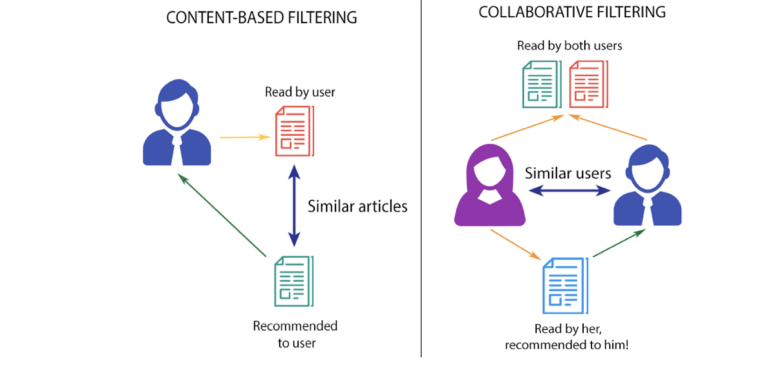

In [1]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('movies.dat' , sep='::' , engine='python' , header=None)

In [5]:
dataset.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
dataset[2][0].split('|')

['Animation', "Children's", 'Comedy']

In [7]:
genres = []

for i in dataset[2]:
  temp = i.split('|')
  temp = ' '.join(temp)
  genres.append(temp)

In [8]:
genres

["Animation Children's Comedy",
 "Adventure Children's Fantasy",
 'Comedy Romance',
 'Comedy Drama',
 'Comedy',
 'Action Crime Thriller',
 'Comedy Romance',
 "Adventure Children's",
 'Action',
 'Action Adventure Thriller',
 'Comedy Drama Romance',
 'Comedy Horror',
 "Animation Children's",
 'Drama',
 'Action Adventure Romance',
 'Drama Thriller',
 'Drama Romance',
 'Thriller',
 'Comedy',
 'Action',
 'Action Comedy Drama',
 'Crime Drama Thriller',
 'Thriller',
 'Drama Sci-Fi',
 'Drama Romance',
 'Drama',
 'Drama',
 'Romance',
 'Adventure Sci-Fi',
 'Drama',
 'Drama',
 'Drama Sci-Fi',
 'Adventure Romance',
 "Children's Comedy Drama",
 'Drama Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy Romance',
 'Drama',
 'Drama War',
 'Action Crime Drama',
 'Drama',
 'Action Adventure',
 'Comedy Drama',
 'Drama Romance',
 'Crime Thriller',
 "Animation Children's Musical Romance",
 'Drama Romance',
 'Crime Thriller',
 'Action Drama Thriller',
 'Comedy',
 'Drama',
 "Children's Comedy",
 'Drama'

In [9]:
dataset[1][0].split(' (')

['Toy Story', '1995)']

In [12]:
movies = []

for i in dataset[1]:
  temp = i.split(' (')
  temp = ''.join(temp[0])
  movies.append(temp)

In [13]:
movies

['Toy Story',
 'Jumanji',
 'Grumpier Old Men',
 'Waiting to Exhale',
 'Father of the Bride Part II',
 'Heat',
 'Sabrina',
 'Tom and Huck',
 'Sudden Death',
 'GoldenEye',
 'American President, The',
 'Dracula: Dead and Loving It',
 'Balto',
 'Nixon',
 'Cutthroat Island',
 'Casino',
 'Sense and Sensibility',
 'Four Rooms',
 'Ace Ventura: When Nature Calls',
 'Money Train',
 'Get Shorty',
 'Copycat',
 'Assassins',
 'Powder',
 'Leaving Las Vegas',
 'Othello',
 'Now and Then',
 'Persuasion',
 'City of Lost Children, The',
 'Shanghai Triad',
 'Dangerous Minds',
 'Twelve Monkeys',
 'Wings of Courage',
 'Babe',
 'Carrington',
 'Dead Man Walking',
 'Across the Sea of Time',
 'It Takes Two',
 'Clueless',
 'Cry, the Beloved Country',
 'Richard III',
 'Dead Presidents',
 'Restoration',
 'Mortal Kombat',
 'To Die For',
 'How to Make an American Quilt',
 'Seven',
 'Pocahontas',
 'When Night Is Falling',
 'Usual Suspects, The',
 'Guardian Angel',
 'Mighty Aphrodite',
 'Lamerica',
 'Big Green, The',
 

In [14]:
dataset['Movies'] = pd.DataFrame(movies)

In [15]:
dataset['Genres'] = pd.DataFrame(genres)

In [16]:
dataset.head()

,0,1,2,Movies,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy,Toy Story,Animation Children's Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Jumanji,Adventure Children's Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,Comedy Romance
3,4,Waiting to Exhale (1995),Comedy|Drama,Waiting to Exhale,Comedy Drama
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,Comedy


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset['Genres']).toarray()

In [18]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(X,X)

In [19]:
X.shape

(3883, 20)

In [20]:
cosine_similarities.shape

(3883, 3883)

In [21]:
movie_title = dataset['Movies']

In [22]:
movie_title

0                         Toy Story
1                           Jumanji
2                  Grumpier Old Men
3                 Waiting to Exhale
4       Father of the Bride Part II
                   ...             
3878               Meet the Parents
3879            Requiem for a Dream
3880                      Tigerland
3881               Two Family House
3882                 Contender, The
Name: Movies, Length: 3883, dtype: object

In [24]:
indices = pd.Series(dataset.index , movie_title)

In [25]:
indices

Movies
Toy Story                         0
Jumanji                           1
Grumpier Old Men                  2
Waiting to Exhale                 3
Father of the Bride Part II       4
                               ... 
Meet the Parents               3878
Requiem for a Dream            3879
Tigerland                      3880
Two Family House               3881
Contender, The                 3882
Length: 3883, dtype: int64

In [32]:
list(enumerate(cosine_similarities[0]))

[(0, 1.0000000000000002),
 (1, 0.30552517260866163),
 (2, 0.19737232084363798),
 (3, 0.2601935102706376),
 (4, 0.3443507165818102),
 (5, 0.0),
 (6, 0.19737232084363798),
 (7, 0.42515343397832733),
 (8, 0.0),
 (9, 0.0),
 (10, 0.17675545354392655),
 (11, 0.1845600194859933),
 (12, 0.93884108558882),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.3443507165818102),
 (19, 0.0),
 (20, 0.1787776591461944),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.6275573197864674),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.3443507165818102),
 (38, 0.19737232084363798),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.2601935102706376),
 (45, 0.0),
 (46, 0.0),
 (47, 0.6890266676808973),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.3443507165818102),
 (52, 0.0),
 (53, 0.6846190653581782),
 (54, 0.0),
 (55, 0.30552517260866163),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0

In [34]:
def movie_recommender(title):
  index = indices[title]
  similarity_scores = list(enumerate(cosine_similarities[index]))
  similarity_scores = sorted(similarity_scores , key=lambda x:x[1] , reverse=True)
  similarity_scores = similarity_scores[1:31]
  movie_indices = [i[0] for i in similarity_scores]
  return movie_title.iloc[movie_indices]

In [35]:
movie_recommender('Toy Story')

1050                      Aladdin and the King of Thieves
2072                                    American Tail, An
2073                  American Tail: Fievel Goes West, An
2285                                   Rugrats Movie, The
2286                                        Bug's Life, A
3045                                          Toy Story 2
3542                                       Saludos Amigos
3682                                          Chicken Run
3685              Adventures of Rocky and Bullwinkle, The
12                                                  Balto
241                                      Gumby: The Movie
310                                    Swan Princess, The
592                                             Pinocchio
612                                       Aristocats, The
700                                      Oliver & Company
876     Land Before Time III: The Time of the Great Gi...
1010                 Winnie the Pooh and the Blustery Day
1012          

In [37]:
dataset[2][0]

"Animation|Children's|Comedy"

In [38]:
dataset[2][1050]

"Animation|Children's|Comedy"

In [39]:
dataset[2][2072]

"Animation|Children's|Comedy"

In [40]:
movie_recommender('Antz')

241                                      Gumby: The Movie
310                                    Swan Princess, The
592                                             Pinocchio
612                                       Aristocats, The
700                                      Oliver & Company
876     Land Before Time III: The Time of the Great Gi...
1010                 Winnie the Pooh and the Blustery Day
1012                              Sword in the Stone, The
1020                               Fox and the Hound, The
1838                                                Mulan
1949                                                Bambi
1964                                  Black Cauldron, The
1979                           Great Mouse Detective, The
2016                                       101 Dalmatians
2020                             Rescuers Down Under, The
2021                                        Rescuers, The
2054                                All Dogs Go to Heaven
2068          

In [41]:
movie_recommender('Tarzan')

241                                      Gumby: The Movie
310                                    Swan Princess, The
592                                             Pinocchio
612                                       Aristocats, The
700                                      Oliver & Company
876     Land Before Time III: The Time of the Great Gi...
1010                 Winnie the Pooh and the Blustery Day
1012                              Sword in the Stone, The
1020                               Fox and the Hound, The
1838                                                Mulan
1949                                                Bambi
1964                                  Black Cauldron, The
1979                           Great Mouse Detective, The
2016                                       101 Dalmatians
2020                             Rescuers Down Under, The
2021                                        Rescuers, The
2054                                All Dogs Go to Heaven
2068          

Like, share, and subscribe to the channel **NERCHUKO**